## %matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
# batch size 
bs = 32

In [2]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import torch

In [4]:
# check CUDA
torch.cuda.is_available()

True

## Create DataSet
- using this tools https://github.com/phe-sto/google-images-download

In [5]:
from google_images_download import google_images_download

ModuleNotFoundError: No module named 'google_images_download'

In [18]:
res = google_images_download.GoogleImageDownload({"keywords": "รถสองแถว", "print_urls": True}) 
paths = res.download()
print(paths)

({'รถสองแถว': ['/home/jakkrit/Desktop/Machine-Learning-Projects/Projects/ThaiVehicleClassification/downloads/รถสองแถว/1_ 1216.jpg', '/home/jakkrit/Desktop/Machine-Learning-Projects/Projects/ThaiVehicleClassification/downloads/รถสองแถว/2_ yusai_kk.png', '/home/jakkrit/Desktop/Machine-Learning-Projects/Projects/ThaiVehicleClassification/downloads/รถสองแถว/3_ songteaw-huahin.jpg', '/home/jakkrit/Desktop/Machine-Learning-Projects/Projects/ThaiVehicleClassification/downloads/รถสองแถว/4_ %e0%b8%a3%e0%b8%96%e0%b8%aa%e0%b8%ad%e0%b8%87%e0%b9%81%e0%b8%96%e0%b8%a7-%e0%b9%84%e0%b8%9b%e0%b9%84%e0%b8%ad%e0%b9%82%e0%b8%a1%e0%b8%9a%e0%b8%b2%e0%b8%a2.png', '/home/jakkrit/Desktop/Machine-Learning-Projects/Projects/ThaiVehicleClassification/downloads/รถสองแถว/5_ dsc0373-1024x680.jpg', '/home/jakkrit/Desktop/Machine-Learning-Projects/Projects/ThaiVehicleClassification/downloads/รถสองแถว/6_ %e0%b8%a3%e0%b8%96%e0%b8%aa%e0%b8%ad%e0%b8%87%e0%b9%81%e0%b8%96%e0%b8%a72.jpg', '/home/jakkrit/Desktop/Machine-Learni

### Upload files to Colab (just in case of training on TPU)

In [ ]:
from google.colab import files
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

[autoreload of IPython.core.ultratb failed: Traceback (most recent call last):
  File "/home/jakkrit/.virtualenvs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    if do_reload:
  File "/home/jakkrit/.virtualenvs/fastai/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
  File "/home/jakkrit/.virtualenvs/fastai/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/jakkrit/.virtualenvs/fastai/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/jakkrit/.virtualenvs/fastai/lib/python3.6/site-packages/IPython/core/ultratb.py", line 131, in <module>
    import IPython.utils.colorable as colorable
AttributeError:

### Check out downloaded images

In [6]:
import os

labels = os.listdir("downloads")
print("No. of labels: {}".format(len(labels)))
print("-----------------")

for label in labels:
    print("{}, {} files".format(label, len(os.listdir("downloads/"+label))))

No. of labels: 1
-----------------
รถสองแถว, 56 files


In [7]:
import numpy as np
from PIL import Image

IndexError: list index out of range

/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3606 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3626 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packag

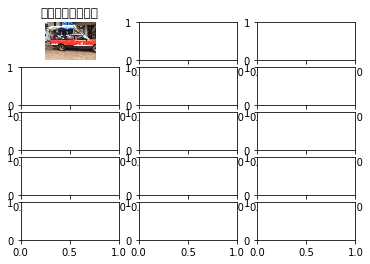

In [8]:
fig, ax = plt.subplots(nrows=5, ncols=3)
# fig.tight_layout()
cnt = 0
for row in ax:
    for col in row:
        image_name = np.random.choice(os.listdir("downloads/" + labels[cnt]))
        im = Image.open("downloads/{}/{}".format(labels[cnt],image_name))
        col.imshow(im)
        col.set_title(labels[cnt])
        col.axis('off')
        cnt += 1
plt.show()

In [9]:
np.random.seed(44)
path = Path('downloads/"รถสองแถว"')
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
                                 ds_tfms=get_transforms(), size=224, num_workers=4).normailze(imagenet_stats)

/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/fastai/data_block.py:454: UserWarning: Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.
  warn("Your training set is empty. If this is by design, pass `ignore_empty=True` to remove this warning.")
/home/jakkrit/.virtualenvs/ml/lib/python3.6/site-packages/fastai/data_block.py:457: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


IndexError: index 0 is out of bounds for axis 0 with size 0